In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import scale
from collections import Counter
import seaborn as sb
% matplotlib inline

In [104]:
df=pd.read_csv('dataset.csv')
df.head()

,Gender,Mother tongue,State,Locaton of school (R/U),School type,Parent's income (in lpa),Percentage in 12th grade,Average number of hours studied per day,Selection (Y/N)
0,Male,Hindi,Madhya Pradesh,Urban,Private,10.0,84.0,7.0,Y
1,Male,Telugu,Andra Pradesh,Urban,Private,9.0,98.0,5.0,Y
2,Male,Hindi,Delhi,Urban,Private,10.0,97.0,2.0,Y
3,Male,Hindi,Uttar Pradesh,Rural,Private,6.0,91.6,6.0,N
4,Male,Odia,Odisha,Rural,Private,13.5,86.0,1.0,N


In [106]:
df.describe()

,Parent's income (in lpa),Percentage in 12th grade,Average number of hours studied per day
count,99.000000,99.00000,99.000000
mean,8.358990,86.12000,3.833333
std,10.651229,9.01774,2.909345
min,1.000000,59.60000,1.000000
25%,4.000000,82.00000,2.000000
50%,6.000000,89.00000,3.000000
75%,10.000000,93.40000,6.000000
max,100.000000,99.60000,14.000000


Data Analysis

Gender Distribution

In [107]:
gender_count=df['Gender'].value_counts()
gender_count

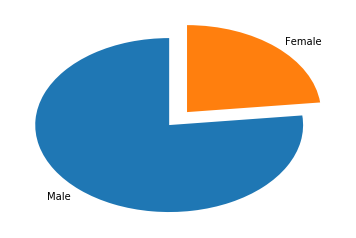

In [108]:
labels = 'Male','Female'
sizes = gender_count
explode = (0.1,0.1)
fig1 , ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,startangle=90)
plt.show()

Area of Education

In [109]:
scloc=df['Locaton of school (R/U)'].value_counts()
scloc

Urban    60
Rural    39
Name: Locaton of school (R/U), dtype: int64

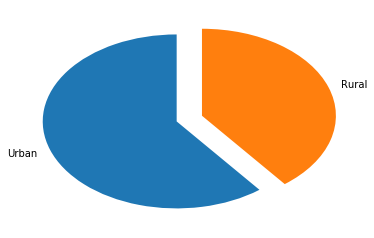

In [114]:
labels = 'Urban','Rural'
sizes = scloc
explode = (0.1,0.1)
fig1 , ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,startangle=90)
plt.show()

Number of Students Selected from the Dataset

In [119]:
selected = df[df['Selection (Y/N)']=='Y']
selected.head(5)

,Gender,Mother tongue,State,Locaton of school (R/U),School type,Parent's income (in lpa),Percentage in 12th grade,Average number of hours studied per day,Selection (Y/N)
0,Male,Hindi,Madhya Pradesh,Urban,Private,10.0,84.0,7.0,Y
1,Male,Telugu,Andra Pradesh,Urban,Private,9.0,98.0,5.0,Y
2,Male,Hindi,Delhi,Urban,Private,10.0,97.0,2.0,Y
7,Male,Hindi,Rajasthan,Urban,Government,15.0,84.0,7.0,Y
11,Male,Hindi,Tamil Nadu,Urban,Private,5.0,76.0,4.0,Y


In [128]:
selection=df['Selection (Y/N)'].value_counts()
selection

N    65
Y    34
Name: Selection (Y/N), dtype: int64

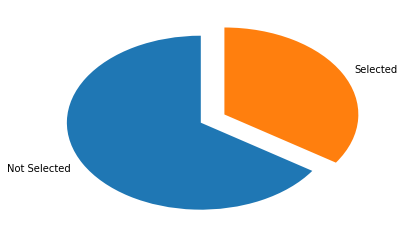

In [143]:
labels = 'Not Selected','Selected'
sizes = selection
explode = (0.1,0.1)
fig1 , ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,startangle=90)
plt.show()

Numbers of Hours of Study

In [153]:
study = df['Average number of hours studied per day '].describe()
study_mean = study['mean']
study_mean 

3.8333333333333335

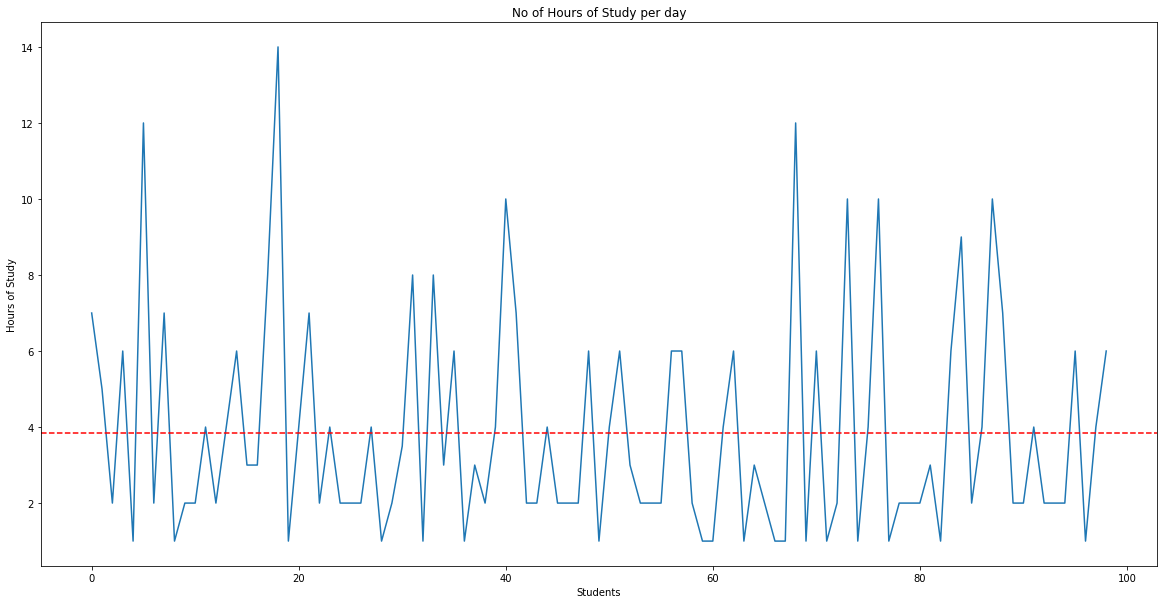

In [167]:
plt.figure(figsize = (20,10))
plt.plot(df['Average number of hours studied per day '])
plt.axhline(study_mean, color='red', linestyle = '--')
plt.title('No of Hours of Study per day')
plt.xlabel('Students')
plt.ylabel('Hours of Study')
plt.show()

Percentage Analysis

In [184]:
ana = df['Percentage in 12th grade'].describe()
mean = ana['mean']

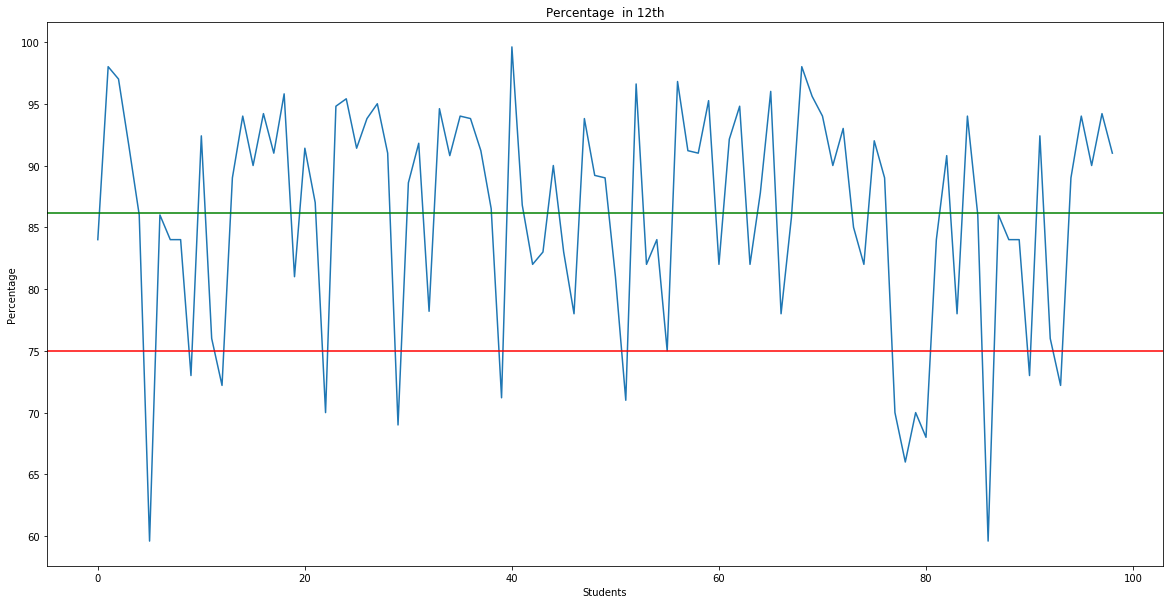

In [188]:
plt.figure(figsize = (20,10))
plt.plot(df['Percentage in 12th grade'])
plt.axhline(75, color='red')
plt.axhline(mean, color='green')
plt.title('Percentage  in 12th')
plt.xlabel('Students')
plt.ylabel('Percentage')
plt.show()

In [188]:
income = df["Parent's income (in lpa)"].describe()
mean_income = income['mean']

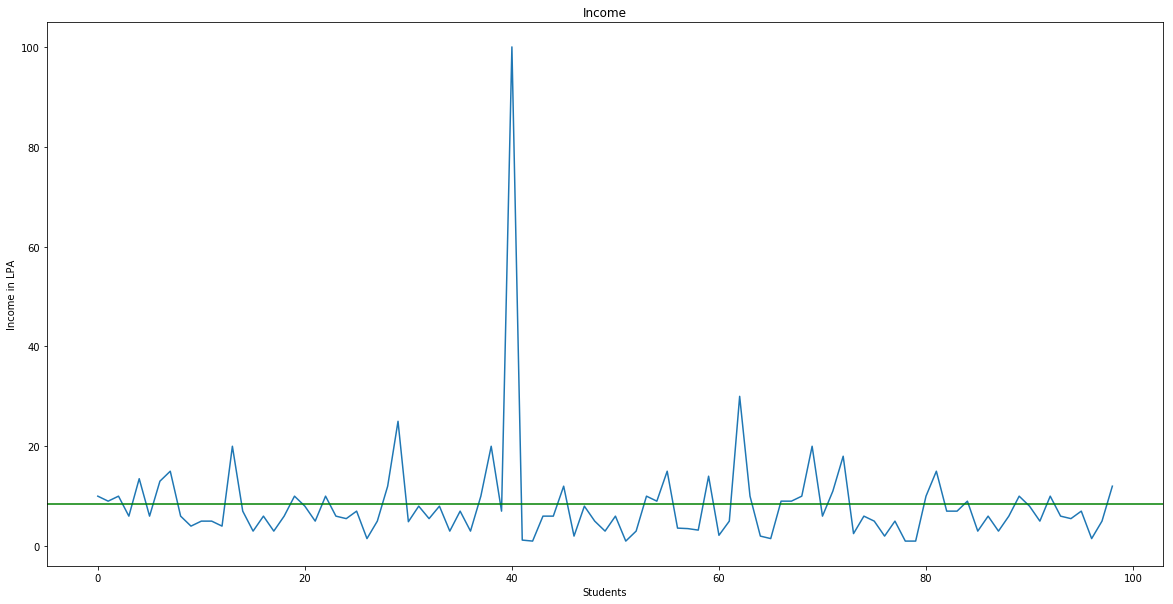

In [189]:
plt.figure(figsize = (20,10))
plt.plot(df["Parent's income (in lpa)"])
plt.axhline(mean_income, color='green')
plt.title('Income')
plt.xlabel('Students')
plt.ylabel('Income in LPA')
plt.show()

The Model ( Linear Regression )

In [190]:
df.keys()

Index(['Gender', 'Mother tongue', 'State', 'Locaton of school (R/U)',
       'School type', 'Parent's income (in lpa)', 'Percentage in 12th grade',
       'Average number of hours studied per day ', 'Selection (Y/N)'],
      dtype='object')

In [191]:
a = df['Gender']
df['Gender'] = a.eq(1).mul(1)
b = df['School type']
df['School type'] = b.eq('Private').mul(1)
c = df['Locaton of school (R/U)']
df['Locaton of school (R/U)'] = c.eq('Urban').mul(1)
d = df['Selection (Y/N)']
df['Selection (Y/N)'] = d.eq('Y').mul(1)

In [192]:
cols_to_transform = ['State' , 'Mother tongue']
df_dummies = pd.get_dummies( df , columns = cols_to_transform)
df_dummies.head(5)

,Gender,Locaton of school (R/U),School type,Parent's income (in lpa),Percentage in 12th grade,Average number of hours studied per day,Selection (Y/N),State_Andra Pradesh,State_Bihar,State_Chattisgarh,...,Mother tongue_English,Mother tongue_Gujarati,Mother tongue_Gujarati,Mother tongue_Hindi,Mother tongue_Kashmiri,Mother tongue_Malayalam,Mother tongue_Marathi,Mother tongue_Odia,Mother tongue_Telugu,Mother tongue_gujarati
0,0,1,1,10.0,84.0,7.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,1,9.0,98.0,5.0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,10.0,97.0,2.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,6.0,91.6,6.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,13.5,86.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


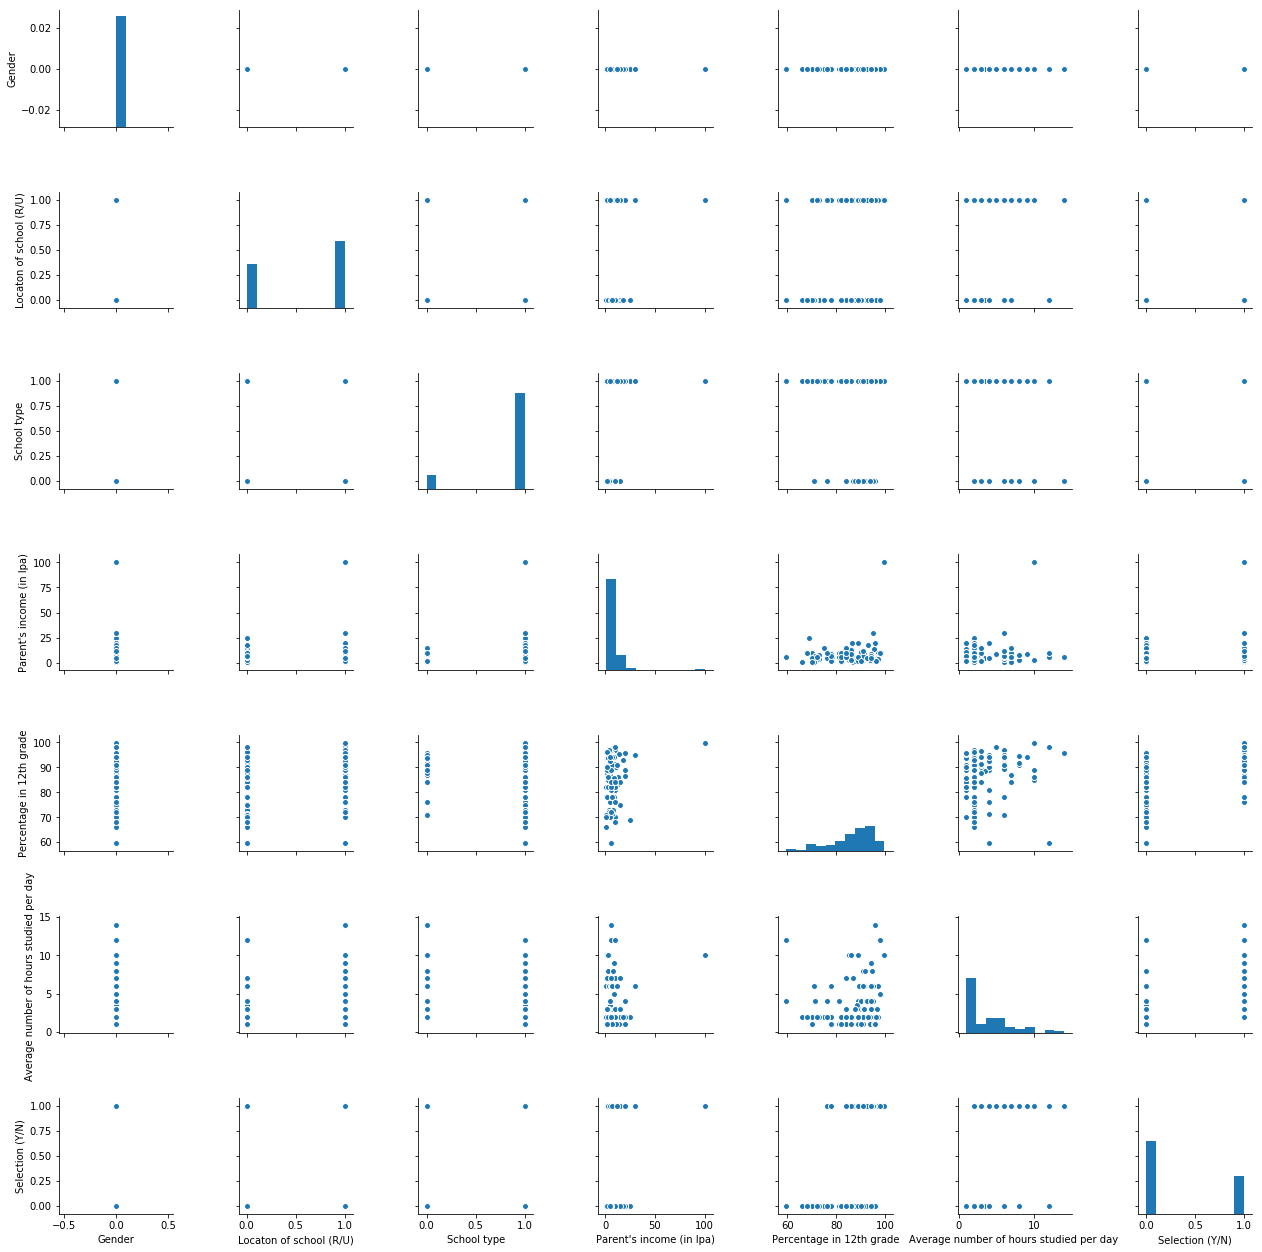

In [193]:
sb.pairplot(df)

In [194]:
df.corr()

,Gender,Locaton of school (R/U),School type,Parent's income (in lpa),Percentage in 12th grade,Average number of hours studied per day,Selection (Y/N)
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Locaton of school (R/U),NaN,1.000000,0.053789,0.075611,0.263818,0.235676,0.365424
School type,NaN,0.053789,1.000000,0.088241,0.007867,-0.218696,-0.096700
Parent's income (in lpa),NaN,0.075611,0.088241,1.000000,0.150860,0.139917,0.131666
Percentage in 12th grade,NaN,0.263818,0.007867,0.150860,1.000000,0.192886,0.405066
Average number of hours studied per day,NaN,0.235676,-0.218696,0.139917,0.192886,1.000000,0.688333
Selection (Y/N),NaN,0.365424,-0.096700,0.131666,0.405066,0.688333,1.000000


As the values above are nearly zero. The features are not corelated ad can be used for prediction.

But we need to conver the Non-Numeric feature inta a suitable Numeric form.

In [199]:
df_data = df_dummies.drop('Selection (Y/N)', axis=1)
df_target = df_dummies.ix[:,6]
x , y = scale(df_data) , df_target

Check for missing Values

In [ ]:
missing_values = x==np.NaN
df[missing_values == True]

,Gender,Mother tongue,State,Locaton of school (R/U),School type,Parent's income (in lpa),Percentage in 12th grade,Average number of hours studied per day,Selection (Y/N)


Hence , the dataset has no missing Values.

In [197]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression(normalize = True)
LinReg.fit(x ,y)
LinReg.score(x,y)

0.7354245276122644